## Atrition project

In [1]:


#We'll import the following libraries:

#numpy: for linear algebra operations.
#pandas: for data processing, reading csv files, etc.
#matplotlib: most used library for plotting on python.
#seaborn: A library that used matplotlib and wraps functionality, so that drawing plots is even easier.
#nltk: Natural Language Toolkit. We will use some of the functions from the library, but not all of them.
#string: Python's string library


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows=10
pd.options.display.max_columns=50

import time
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score,roc_curve,auc
from xgboost import plot_importance

from sklearn.externals.six import StringIO 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from matplotlib import pyplot

from IPython.display import Image  
import pydotplus
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,export_graphviz,DecisionTreeClassifier,export_graphviz
from sklearn import tree
from xgboost import XGBClassifier

In [3]:


os.chdir('C:\\Users\\Poorna\\Desktop\\ddata  science projects\\project 2') 


In [4]:
data = pd.read_csv("MFG10YearTerminationData.csv")

data

EmployeeID   recorddate_key birthdate_key orighiredate_key  \
0            1318  12/31/2006 0:00      1/3/1954        8/28/1989   
1            1318  12/31/2007 0:00      1/3/1954        8/28/1989   
2            1318  12/31/2008 0:00      1/3/1954        8/28/1989   
3            1318  12/31/2009 0:00      1/3/1954        8/28/1989   
4            1318  12/31/2010 0:00      1/3/1954        8/28/1989   
...           ...              ...           ...              ...   
49648        8258   12/1/2015 0:00     5/28/1994        8/19/2013   
49649        8264    8/1/2013 0:00     6/13/1994        8/27/2013   
49650        8279   12/1/2015 0:00     7/18/1994        9/15/2013   
49651        8296   12/1/2013 0:00      9/2/1994        10/9/2013   
49652        8321   12/1/2014 0:00    11/28/1994       11/24/2013   

      terminationdate_key  age  length_of_service    city_name  \
0                1/1/1900   52                 17    Vancouver   
1                1/1/1900   53                 18    Vancouver   
2                1/1/1900   54                 19    Vancouver   
3                1/1/1900   55                 20    Vancouver   
4                1/1/1900   56                 21    Vancouver   
...                   ...  ...                ...          ...   
49648          12/30/2015   21                  2    Valemount   
49649           8/30/2013   19                  0    Vancouver   
49650          12/30/2015   21                  2   White Rock   
49651          12/31/2013   19                  0      Kelowna   
49652          12/30/2014   20                  1  Grand Forks   

        department_name     job_title  store_name gender_short gender_full  \
0             Executive           CEO          35            M        Male   
1             Executive           CEO          35            M        Male   
2             Executive           CEO          35            M        Male   
3             Executive           CEO          35            M        Male   
4             Executive           CEO          35            M        Male   
...                 ...           ...         ...          ...         ...   
49648             Dairy  Dairy Person          34            M        Male   
49649  Customer Service       Cashier          44            F      Female   
49650  Customer Service       Cashier          39            F      Female   
49651  Customer Service       Cashier          16            F      Female   
49652  Customer Service       Cashier          13            F      Female   

      termreason_desc   termtype_desc  STATUS_YEAR      STATUS BUSINESS_UNIT  
0      Not Applicable  Not Applicable         2006      ACTIVE    HEADOFFICE  
1      Not Applicable  Not Applicable         2007      ACTIVE    HEADOFFICE  
2      Not Applicable  Not Applicable         2008      ACTIVE    HEADOFFICE  
3      Not Applicable  Not Applicable         2009      ACTIVE    HEADOFFICE  
4      Not Applicable  Not Applicable         2010      ACTIVE    HEADOFFICE  
...               ...             ...          ...         ...           ...  
49648          Layoff     Involuntary         2015  TERMINATED        STORES  
49649      Resignaton       Voluntary         2013  TERMINATED        STORES  
49650          Layoff     Involuntary         2015  TERMINATED        STORES  
49651      Resignaton       Voluntary         2013  TERMINATED        STORES  
49652          Layoff     Involuntary         2014  TERMINATED        STORES  

[49653 rows x 18 columns]

# ch

In [5]:

#Contingency Table
contingency_table=pd.crosstab(data["gender_full"],data["STATUS"])
print('contingency_table :-\n',contingency_table)

contingency_table :-
 STATUS       ACTIVE  TERMINATED
gender_full                    
Female        24983         915
Male          23185         570


In [6]:
#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[24983   915]
 [23185   570]]


In [7]:
#Expected Values
import scipy.stats
b=scipy.stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)

Expected Values :-
 [[25123.45405111   774.54594889]
 [23044.54594889   710.45405111]]


In [8]:
#Degree of Freedom
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
df=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",df)

#or
#df=b[2]
#print("Degree of Freedom:-",df)

Degree of Freedom:- 1


In [9]:
#Significance Level 5%
alpha=0.05

In [10]:
#chi-square statistic - χ2
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 54.87805254581079


In [11]:
#critical_value
critical_value=chi2.ppf(q=1-alpha,df=df)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [12]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
print('p-value:',p_value)

p-value: 1.2823075934420558e-13


In [13]:
print('Significance level: ',alpha)
print('Degree of Freedom: ',df)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)

Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 54.87805254581079
critical_value: 3.841458820694124
p-value: 1.2823075934420558e-13


In [14]:
#compare chi_square_statistic with critical_value and p-value which is the probability of getting chi-square>0.09 (chi_square_statistic)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


In [15]:
#Import Data

col_names = data.columns.tolist()

print(col_names)


['EmployeeID', 'recorddate_key', 'birthdate_key', 'orighiredate_key', 'terminationdate_key', 'age', 'length_of_service', 'city_name', 'department_name', 'job_title', 'store_name', 'gender_short', 'gender_full', 'termreason_desc', 'termtype_desc', 'STATUS_YEAR', 'STATUS', 'BUSINESS_UNIT']


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 18 columns):
EmployeeID             49653 non-null int64
recorddate_key         49653 non-null object
birthdate_key          49653 non-null object
orighiredate_key       49653 non-null object
terminationdate_key    49653 non-null object
age                    49653 non-null int64
length_of_service      49653 non-null int64
city_name              49653 non-null object
department_name        49653 non-null object
job_title              49653 non-null object
store_name             49653 non-null int64
gender_short           49653 non-null object
gender_full            49653 non-null object
termreason_desc        49653 non-null object
termtype_desc          49653 non-null object
STATUS_YEAR            49653 non-null int64
STATUS                 49653 non-null object
BUSINESS_UNIT          49653 non-null object
dtypes: int64(5), object(13)
memory usage: 6.8+ MB


In [17]:
STATUS_YEAR = data.select_dtypes(['category']).columns


In [18]:
data.describe()

EmployeeID           age  length_of_service    store_name  \
count  49653.000000  49653.000000       49653.000000  49653.000000   
mean    4859.495740     42.077035          10.434596     27.297605   
std     1826.571142     12.427257           6.325286     13.514134   
min     1318.000000     19.000000           0.000000      1.000000   
25%     3360.000000     31.000000           5.000000     16.000000   
50%     5031.000000     42.000000          10.000000     28.000000   
75%     6335.000000     53.000000          15.000000     42.000000   
max     8336.000000     65.000000          26.000000     46.000000   

        STATUS_YEAR  
count  49653.000000  
mean    2010.612612  
std        2.845577  
min     2006.000000  
25%     2008.000000  
50%     2011.000000  
75%     2013.000000  
max     2015.000000

In [19]:
data.shape

(49653, 18)

In [20]:
print(data.isnull().sum())



EmployeeID             0
recorddate_key         0
birthdate_key          0
orighiredate_key       0
terminationdate_key    0
                      ..
termreason_desc        0
termtype_desc          0
STATUS_YEAR            0
STATUS                 0
BUSINESS_UNIT          0
Length: 18, dtype: int64


In [21]:
x= data.STATUS

y=data.STATUS_YEAR

In [22]:
#Lets redo the city information as table
pd.value_counts(x).to_frame().reset_index()


index  STATUS
0      ACTIVE   48168
1  TERMINATED    1485

In [23]:
data.groupby([ "STATUS_YEAR","STATUS"]).size().reset_index(name="frequency")

STATUS_YEAR      STATUS  frequency
0          2006      ACTIVE       4445
1          2006  TERMINATED        134
2          2007      ACTIVE       4521
3          2007  TERMINATED        162
4          2008      ACTIVE       4603
..          ...         ...        ...
15         2013  TERMINATED        105
16         2014      ACTIVE       4962
17         2014  TERMINATED        253
18         2015      ACTIVE       4799
19         2015  TERMINATED        162

[20 rows x 3 columns]

In [24]:
df1= pd.crosstab(data.STATUS_YEAR,data.STATUS)


In [25]:
df1['previous_state'] = df1['ACTIVE'].shift(1)

In [26]:
df1

STATUS       ACTIVE  TERMINATED  previous_state
STATUS_YEAR                                    
2006           4445         134             NaN
2007           4521         162          4445.0
2008           4603         164          4521.0
2009           4710         142          4603.0
2010           4840         123          4710.0
2011           4972         110          4840.0
2012           5101         130          4972.0
2013           5215         105          5101.0
2014           4962         253          5215.0
2015           4799         162          4962.0

In [27]:
df1['percenTerminated'] = df1['TERMINATED']/df1['previous_state']*100

In [28]:
df1

STATUS       ACTIVE  TERMINATED  previous_state  percenTerminated
STATUS_YEAR                                                      
2006           4445         134             NaN               NaN
2007           4521         162          4445.0          3.644544
2008           4603         164          4521.0          3.627516
2009           4710         142          4603.0          3.084945
2010           4840         123          4710.0          2.611465
2011           4972         110          4840.0          2.272727
2012           5101         130          4972.0          2.614642
2013           5215         105          5101.0          2.058420
2014           4962         253          5215.0          4.851390
2015           4799         162          4962.0          3.264813

In [29]:
df1.isnull()

STATUS       ACTIVE  TERMINATED  previous_state  percenTerminated
STATUS_YEAR                                                      
2006          False       False            True              True
2007          False       False           False             False
2008          False       False           False             False
2009          False       False           False             False
2010          False       False           False             False
2011          False       False           False             False
2012          False       False           False             False
2013          False       False           False             False
2014          False       False           False             False
2015          False       False           False             False

In [30]:
df1=df1.dropna()

In [31]:
np.mean(df1)

STATUS
ACTIVE              4858.111111
TERMINATED           150.111111
previous_state      4818.777778
percenTerminated       3.114496
dtype: float64

In [32]:
df1.reset_index()

STATUS  STATUS_YEAR  ACTIVE  TERMINATED  previous_state  percenTerminated
0              2007    4521         162          4445.0          3.644544
1              2008    4603         164          4521.0          3.627516
2              2009    4710         142          4603.0          3.084945
3              2010    4840         123          4710.0          2.611465
4              2011    4972         110          4840.0          2.272727
5              2012    5101         130          4972.0          2.614642
6              2013    5215         105          5101.0          2.058420
7              2014    4962         253          5215.0          4.851390
8              2015    4799         162          4962.0          3.264813

In [33]:
x=df1.iloc[:,0].values
y=df1.iloc[:,3].values

In [34]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

%matplotlib inline

plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)



In [35]:

import pandas as pd
from ggplot import *

In [36]:
data.head()

EmployeeID   recorddate_key birthdate_key orighiredate_key  \
0        1318  12/31/2006 0:00      1/3/1954        8/28/1989   
1        1318  12/31/2007 0:00      1/3/1954        8/28/1989   
2        1318  12/31/2008 0:00      1/3/1954        8/28/1989   
3        1318  12/31/2009 0:00      1/3/1954        8/28/1989   
4        1318  12/31/2010 0:00      1/3/1954        8/28/1989   

  terminationdate_key  age  length_of_service  city_name department_name  \
0            1/1/1900   52                 17  Vancouver       Executive   
1            1/1/1900   53                 18  Vancouver       Executive   
2            1/1/1900   54                 19  Vancouver       Executive   
3            1/1/1900   55                 20  Vancouver       Executive   
4            1/1/1900   56                 21  Vancouver       Executive   

  job_title  store_name gender_short gender_full termreason_desc  \
0       CEO          35            M        Male  Not Applicable   
1       CEO          35            M        Male  Not Applicable   
2       CEO          35            M        Male  Not Applicable   
3       CEO          35            M        Male  Not Applicable   
4       CEO          35            M        Male  Not Applicable   

    termtype_desc  STATUS_YEAR  STATUS BUSINESS_UNIT  
0  Not Applicable         2006  ACTIVE    HEADOFFICE  
1  Not Applicable         2007  ACTIVE    HEADOFFICE  
2  Not Applicable         2008  ACTIVE    HEADOFFICE  
3  Not Applicable         2009  ACTIVE    HEADOFFICE  
4  Not Applicable         2010  ACTIVE    HEADOFFICE

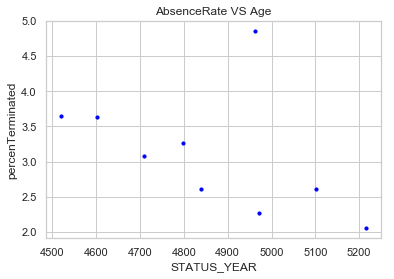

In [37]:


plt.scatter(x,y,label='',color='blue',s=10)
plt.xlabel('STATUS_YEAR')
plt.ylabel('percenTerminated')

plt.title('AbsenceRate VS Age')
plt.show()

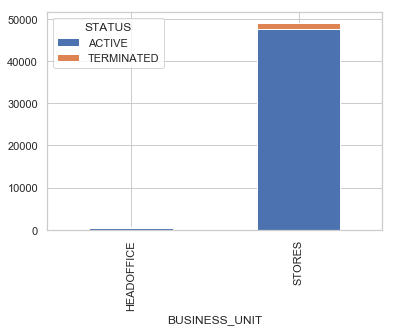

In [38]:
B=data.groupby(['BUSINESS_UNIT','STATUS'])['BUSINESS_UNIT'].count().unstack('STATUS')
B.plot(kind='bar',stacked=True)
plt.show()

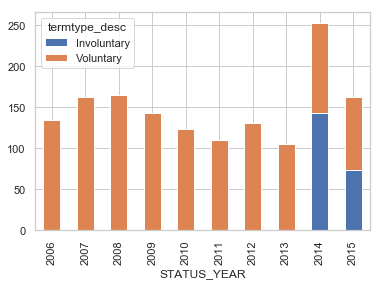

In [39]:
B=data.groupby(['STATUS_YEAR','termtype_desc'])['STATUS_YEAR'].count().unstack('termtype_desc')
B=B.drop('Not Applicable',axis=1)
B.plot(kind='bar',stacked=True)
plt.show()

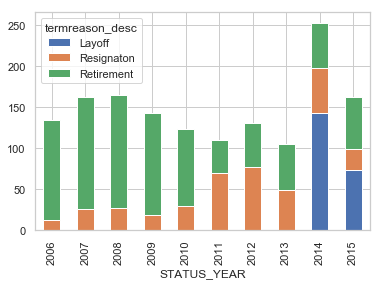

In [40]:
B=data.groupby(['STATUS_YEAR','termreason_desc'])['STATUS_YEAR'].count().unstack('termreason_desc')
B=B.drop('Not Applicable',axis=1)
B.plot(kind='bar',stacked=True)
plt.show()

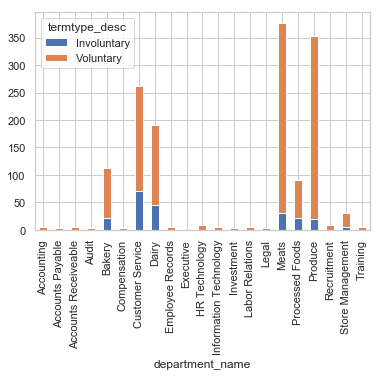

In [41]:
B=data.groupby(['department_name','termtype_desc'])['department_name'].count().unstack('termtype_desc')
B=B.drop('Not Applicable',axis=1)
B.plot(kind='bar',stacked=True)
plt.show()


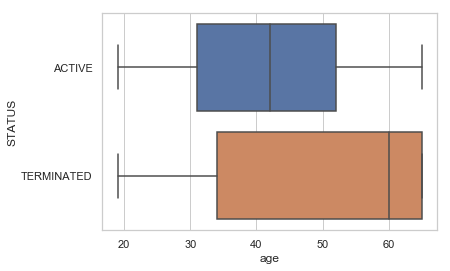

In [42]:
sns.boxplot(data.age,data.STATUS)
plt.show()

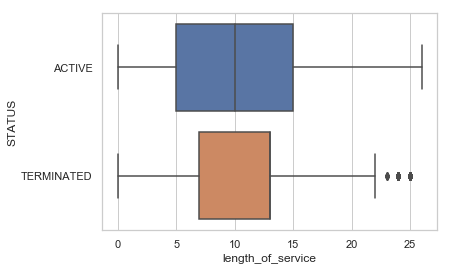

In [43]:
sns.boxplot(data.length_of_service,data.STATUS)
plt.show()

In [44]:
data.head()

EmployeeID   recorddate_key birthdate_key orighiredate_key  \
0        1318  12/31/2006 0:00      1/3/1954        8/28/1989   
1        1318  12/31/2007 0:00      1/3/1954        8/28/1989   
2        1318  12/31/2008 0:00      1/3/1954        8/28/1989   
3        1318  12/31/2009 0:00      1/3/1954        8/28/1989   
4        1318  12/31/2010 0:00      1/3/1954        8/28/1989   

  terminationdate_key  age  length_of_service  city_name department_name  \
0            1/1/1900   52                 17  Vancouver       Executive   
1            1/1/1900   53                 18  Vancouver       Executive   
2            1/1/1900   54                 19  Vancouver       Executive   
3            1/1/1900   55                 20  Vancouver       Executive   
4            1/1/1900   56                 21  Vancouver       Executive   

  job_title  store_name gender_short gender_full termreason_desc  \
0       CEO          35            M        Male  Not Applicable   
1       CEO          35            M        Male  Not Applicable   
2       CEO          35            M        Male  Not Applicable   
3       CEO          35            M        Male  Not Applicable   
4       CEO          35            M        Male  Not Applicable   

    termtype_desc  STATUS_YEAR  STATUS BUSINESS_UNIT  
0  Not Applicable         2006  ACTIVE    HEADOFFICE  
1  Not Applicable         2007  ACTIVE    HEADOFFICE  
2  Not Applicable         2008  ACTIVE    HEADOFFICE  
3  Not Applicable         2009  ACTIVE    HEADOFFICE  
4  Not Applicable         2010  ACTIVE    HEADOFFICE

In [45]:
data['STATUS'].value_counts()

ACTIVE        48168
TERMINATED     1485
Name: STATUS, dtype: int64

In [46]:
dat=data[data.STATUS_YEAR < 2015]
dat1=data[data.STATUS_YEAR > 2014]

In [47]:
dat

EmployeeID   recorddate_key birthdate_key orighiredate_key  \
0            1318  12/31/2006 0:00      1/3/1954        8/28/1989   
1            1318  12/31/2007 0:00      1/3/1954        8/28/1989   
2            1318  12/31/2008 0:00      1/3/1954        8/28/1989   
3            1318  12/31/2009 0:00      1/3/1954        8/28/1989   
4            1318  12/31/2010 0:00      1/3/1954        8/28/1989   
...           ...              ...           ...              ...   
49645        8223   10/1/2013 0:00     2/11/1994        6/24/2013   
49646        8226    9/1/2013 0:00     2/16/1994        6/26/2013   
49649        8264    8/1/2013 0:00     6/13/1994        8/27/2013   
49651        8296   12/1/2013 0:00      9/2/1994        10/9/2013   
49652        8321   12/1/2014 0:00    11/28/1994       11/24/2013   

      terminationdate_key  age  length_of_service    city_name  \
0                1/1/1900   52                 17    Vancouver   
1                1/1/1900   53                 18    Vancouver   
2                1/1/1900   54                 19    Vancouver   
3                1/1/1900   55                 20    Vancouver   
4                1/1/1900   56                 21    Vancouver   
...                   ...  ...                ...          ...   
49645          10/17/2013   19                  0        Trail   
49646           9/14/2013   19                  0     Victoria   
49649           8/30/2013   19                  0    Vancouver   
49651          12/31/2013   19                  0      Kelowna   
49652          12/30/2014   20                  1  Grand Forks   

        department_name job_title  store_name gender_short gender_full  \
0             Executive       CEO          35            M        Male   
1             Executive       CEO          35            M        Male   
2             Executive       CEO          35            M        Male   
3             Executive       CEO          35            M        Male   
4             Executive       CEO          35            M        Male   
...                 ...       ...         ...          ...         ...   
49645  Customer Service   Cashier          33            M        Male   
49646  Customer Service   Cashier          46            F      Female   
49649  Customer Service   Cashier          44            F      Female   
49651  Customer Service   Cashier          16            F      Female   
49652  Customer Service   Cashier          13            F      Female   

      termreason_desc   termtype_desc  STATUS_YEAR      STATUS BUSINESS_UNIT  
0      Not Applicable  Not Applicable         2006      ACTIVE    HEADOFFICE  
1      Not Applicable  Not Applicable         2007      ACTIVE    HEADOFFICE  
2      Not Applicable  Not Applicable         2008      ACTIVE    HEADOFFICE  
3      Not Applicable  Not Applicable         2009      ACTIVE    HEADOFFICE  
4      Not Applicable  Not Applicable         2010      ACTIVE    HEADOFFICE  
...               ...             ...          ...         ...           ...  
49645      Resignaton       Voluntary         2013  TERMINATED        STORES  
49646      Resignaton       Voluntary         2013  TERMINATED        STORES  
49649      Resignaton       Voluntary         2013  TERMINATED        STORES  
49651      Resignaton       Voluntary         2013  TERMINATED        STORES  
49652          Layoff     Involuntary         2014  TERMINATED        STORES  

[44692 rows x 18 columns]

In [48]:
#x=data1.iloc[:,0:6]

In [49]:
x=dat[['age', 'length_of_service', 'department_name', 'gender_full','STATUS_YEAR', 'BUSINESS_UNIT']]


In [50]:
y=dat[['STATUS']]


In [51]:
x.head()

age  length_of_service department_name gender_full  STATUS_YEAR  \
0   52                 17       Executive        Male         2006   
1   53                 18       Executive        Male         2007   
2   54                 19       Executive        Male         2008   
3   55                 20       Executive        Male         2009   
4   56                 21       Executive        Male         2010   

  BUSINESS_UNIT  
0    HEADOFFICE  
1    HEADOFFICE  
2    HEADOFFICE  
3    HEADOFFICE  
4    HEADOFFICE

In [52]:
x1=dat1[['age', 'length_of_service']]
y1=dat1[['STATUS']]

In [53]:
"""
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X_1 = LabelEncoder()
x[:, 2] = labelencoder_X_1.fit_transform(x[:, 2])

labelencoder_X_2 = LabelEncoder()
x[:, 3] = labelencoder_X_2.fit_transform(x[:, 3])

labelencoder_X_3 = LabelEncoder()
x[:, 4] = labelencoder_X_3.fit_transform(x[:, 4])

labelencoder_X_4 = LabelEncoder()
x[:, 5] = labelencoder_X_4.fit_transform(x[:, 5])

onehotencoder = OneHotEncoder(categorical_features = [1])
x = onehotencoder.fit_transform(x).toarray()
x = x[:, 1:]

"""

'\n# Encoding categorical data\nfrom sklearn.preprocessing import LabelEncoder, OneHotEncoder\n\nlabelencoder_X_1 = LabelEncoder()\nx[:, 2] = labelencoder_X_1.fit_transform(x[:, 2])\n\nlabelencoder_X_2 = LabelEncoder()\nx[:, 3] = labelencoder_X_2.fit_transform(x[:, 3])\n\nlabelencoder_X_3 = LabelEncoder()\nx[:, 4] = labelencoder_X_3.fit_transform(x[:, 4])\n\nlabelencoder_X_4 = LabelEncoder()\nx[:, 5] = labelencoder_X_4.fit_transform(x[:, 5])\n\nonehotencoder = OneHotEncoder(categorical_features = [1])\nx = onehotencoder.fit_transform(x).toarray()\nx = x[:, 1:]\n\n'

In [54]:
labelencoder=LabelEncoder()


label_encoder=LabelEncoder()
integer_encoded=label_encoder.fit_transform(y)
print(integer_encoded)

onehot=OneHotEncoder(sparse=False)
y=integer_encoded=integer_encoded.reshape(len(integer_encoded),1)
y

onehot_encoded=onehot.fit_transform(integer_encoded)
print(onehot_encoded)

[0 0 0 ... 1 1 1]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [55]:

labelencoder=LabelEncoder()


label_encoder=LabelEncoder()
integer_encoded=label_encoder.fit_transform(x.STATUS_YEAR)
print(integer_encoded)

onehot=OneHotEncoder(sparse=False)
x.STATUS_YEAR=integer_encoded=integer_encoded.reshape(len(integer_encoded),1)
x.STATUS_YEAR

onehot_encoded=onehot.fit_transform(integer_encoded)
print(onehot_encoded)

[0 1 2 ... 7 7 8]
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [56]:
## Gender



labelencoder=LabelEncoder()


label_encoder=LabelEncoder()
integer_encoded=label_encoder.fit_transform(x.gender_full)
print(integer_encoded)

onehot=OneHotEncoder(sparse=False)
x.gender_full=integer_encoded=integer_encoded.reshape(len(integer_encoded),1)
x.gender_full

onehot_encoded=onehot.fit_transform(integer_encoded)
print(onehot_encoded)


[1 1 1 ... 0 0 0]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [57]:
labelencoder=LabelEncoder()


label_encoder=LabelEncoder()
integer_encoded=label_encoder.fit_transform(x.BUSINESS_UNIT)
print(integer_encoded)

onehot=OneHotEncoder(sparse=False)
x.BUSINESS_UNIT=integer_encoded=integer_encoded.reshape(len(integer_encoded),1)
x.BUSINESS_UNIT

onehot_encoded=onehot.fit_transform(integer_encoded)
print(onehot_encoded)

[0 0 0 ... 1 1 1]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [58]:
labelencoder=LabelEncoder()


label_encoder=LabelEncoder()
integer_encoded=label_encoder.fit_transform(x.department_name)
print(integer_encoded)

onehot=OneHotEncoder(sparse=False)
x.department_name=integer_encoded=integer_encoded.reshape(len(integer_encoded),1)
x.department_name

onehot_encoded=onehot.fit_transform(integer_encoded)
print(onehot_encoded)

[9 9 9 ... 6 6 6]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [59]:
x.head()

age  length_of_service  department_name  gender_full  STATUS_YEAR  \
0   52                 17                9            1            0   
1   53                 18                9            1            1   
2   54                 19                9            1            2   
3   55                 20                9            1            3   
4   56                 21                9            1            4   

   BUSINESS_UNIT  
0              0  
1              0  
2              0  
3              0  
4              0

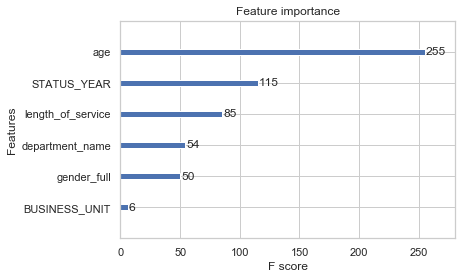

In [60]:

#import xgboost 
from matplotlib import pyplot
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
#split data into x and y

#mod
model=XGBClassifier()
model.fit(x,y)
plot_importance(model)
pyplot.show()

In [61]:
y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [62]:
pd.DataFrame(y)

0
0      0
1      0
2      0
3      0
4      0
...   ..
44687  1
44688  1
44689  1
44690  1
44691  1

[44692 rows x 1 columns]

# feature importance

In [63]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=0)

# Decision Tree

In [64]:
clf=DecisionTreeClassifier(class_weight=None, criterion='gini',max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')



In [65]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [66]:
y_pred=clf.predict(x_test)

In [67]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [68]:
pd.DataFrame(y_pred)

0
0      0
1      0
2      0
3      0
4      0
...   ..
11168  0
11169  0
11170  0
11171  0
11172  0

[11173 rows x 1 columns]

In [69]:
cm=confusion_matrix(y_test,y_pred)

In [70]:
cm

array([[10815,    24],
       [  149,   185]], dtype=int64)

In [71]:
dec=accuracy_score(y_test,y_pred)
dec

0.9845162445180345

In [72]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
estimator = tree.DecisionTreeClassifier()
estimator.fit(x_train, y_train)

dot_data = StringIO()
export_graphviz(estimator, out_file=dot_data,  
                filled=True, rounded=True,
                class_names=data.STATUS,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())



dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.7196 to fit



In [73]:


print(classification_report(y_test, clf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     10839
           1       0.89      0.55      0.68       334

   micro avg       0.98      0.98      0.98     11173
   macro avg       0.94      0.78      0.84     11173
weighted avg       0.98      0.98      0.98     11173



# AdaBoost Model

In [74]:
adb =AdaBoostClassifier()
adb.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [75]:
y_pred = adb.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [76]:
ada=accuracy_score(y_test, adb.predict(x_test))
ada

0.9853217578090039

In [77]:
cm0=confusion_matrix(y_test,y_pred)
cm0

array([[10838,     1],
       [  163,   171]], dtype=int64)

In [78]:
#print(classification_report(y_test, predict(x_test)))

# Random Forest

In [79]:
# Fitting Random Forest Classification to the Training set
rlf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
rlf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [80]:
# Predicting the Test set results
y_pred = rlf.predict(x_test)

In [81]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [82]:
ref=accuracy_score(y_test, rlf.predict(x_test))
ref

0.9888123154032041

In [83]:
cm1=confusion_matrix(y_test,y_pred)

In [84]:
cm1

array([[10821,    18],
       [  107,   227]], dtype=int64)

In [85]:
print(classification_report(y_test, rlf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     10839
           1       0.93      0.68      0.78       334

   micro avg       0.99      0.99      0.99     11173
   macro avg       0.96      0.84      0.89     11173
weighted avg       0.99      0.99      0.99     11173



# Support Vector Machine

In [86]:
#SVM Classifier

slf = SVC()
slf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [87]:
y_pred = slf.predict(x_test)

In [88]:
cms=confusion_matrix(y_test,y_pred)
cms

array([[10838,     1],
       [  123,   211]], dtype=int64)

In [89]:

from sklearn import  metrics
print("Classification Report:\n %s:" % (metrics.classification_report(y_test,y_pred)))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     10839
           1       1.00      0.63      0.77       334

   micro avg       0.99      0.99      0.99     11173
   macro avg       0.99      0.82      0.88     11173
weighted avg       0.99      0.99      0.99     11173
:


In [90]:
cm2=pd.DataFrame(confusion_matrix(y_test,y_pred), ['Actual: NOT', 'Actual: SURVIVED'], ['Predicted: NO', 'Predicted: SURVIVED'])
cm2

Predicted: NO  Predicted: SURVIVED
Actual: NOT               10838                    1
Actual: SURVIVED            123                  211

In [91]:
svc=accuracy_score(y_test, clf.predict(x_test))
svc

0.9845162445180345

# ROC and AUC

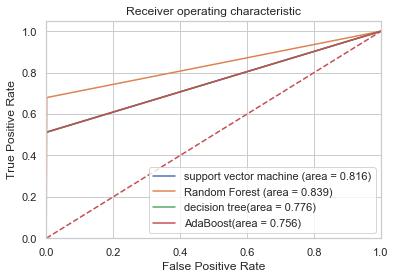

In [92]:
#ROC for logistic regression
svc_roc_auc = roc_auc_score(y_test, slf.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, slf.predict(x_test))

#ROC for decision tree
tree_roc_auc = roc_auc_score(y_test, clf.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict(x_test))
#ROC for AdaBoostModel

ada_roc_auc = roc_auc_score(y_test, adb.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, adb.predict(x_test))

#ROC for Random Forrest
rf_roc_auc = roc_auc_score(y_test, rlf.predict(x_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rlf.predict(x_test))

#ROC Curve for Random Forest & Logistic Regression
plt.figure()
plt.plot(fpr, tpr, label='support vector machine (area = %0.3f)' % svc_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.3f)' % rf_roc_auc)
plt.plot(fpr, tpr, label='decision tree(area = %0.3f)' % tree_roc_auc)
plt.plot(fpr, tpr, label='AdaBoost(area = %0.3f)' % ada_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()


In [93]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines',  
              'Random Forest', 'Decision Tree','adaboost'],
    'Accuracy': [svc, 
              ref, 
              dec,ada]})
result_df = results.sort_values(by='Model', ascending=False)
result_df = result_df.set_index('Model')
result_df

Accuracy
Model                            
adaboost                 0.985322
Support Vector Machines  0.984516
Random Forest            0.988812
Decision Tree            0.984516

In [94]:
data.corr()

EmployeeID       age  length_of_service  store_name  \
EmployeeID           1.000000 -0.926278          -0.898833   -0.010321   
age                 -0.926278  1.000000           0.909430   -0.004068   
length_of_service   -0.898833  0.909430           1.000000    0.011724   
store_name          -0.010321 -0.004068           0.011724    1.000000   
STATUS_YEAR          0.198741 -0.039738           0.237022    0.008656   

                   STATUS_YEAR  
EmployeeID            0.198741  
age                  -0.039738  
length_of_service     0.237022  
store_name            0.008656  
STATUS_YEAR           1.000000

In [95]:
data.head()

EmployeeID   recorddate_key birthdate_key orighiredate_key  \
0        1318  12/31/2006 0:00      1/3/1954        8/28/1989   
1        1318  12/31/2007 0:00      1/3/1954        8/28/1989   
2        1318  12/31/2008 0:00      1/3/1954        8/28/1989   
3        1318  12/31/2009 0:00      1/3/1954        8/28/1989   
4        1318  12/31/2010 0:00      1/3/1954        8/28/1989   

  terminationdate_key  age  length_of_service  city_name department_name  \
0            1/1/1900   52                 17  Vancouver       Executive   
1            1/1/1900   53                 18  Vancouver       Executive   
2            1/1/1900   54                 19  Vancouver       Executive   
3            1/1/1900   55                 20  Vancouver       Executive   
4            1/1/1900   56                 21  Vancouver       Executive   

  job_title  store_name gender_short gender_full termreason_desc  \
0       CEO          35            M        Male  Not Applicable   
1       CEO          35            M        Male  Not Applicable   
2       CEO          35            M        Male  Not Applicable   
3       CEO          35            M        Male  Not Applicable   
4       CEO          35            M        Male  Not Applicable   

    termtype_desc  STATUS_YEAR  STATUS BUSINESS_UNIT  
0  Not Applicable         2006  ACTIVE    HEADOFFICE  
1  Not Applicable         2007  ACTIVE    HEADOFFICE  
2  Not Applicable         2008  ACTIVE    HEADOFFICE  
3  Not Applicable         2009  ACTIVE    HEADOFFICE  
4  Not Applicable         2010  ACTIVE    HEADOFFICE

# error matrix,overall error percentage,class error percentage for Decision tree

In [96]:
model=DecisionTreeClassifier()

In [97]:
x=data[['age','length_of_service']]
y=data[['STATUS']]

In [98]:
model.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [99]:
z=model.predict(x1)

In [100]:
z

array(['ACTIVE', 'ACTIVE', 'ACTIVE', ..., 'ACTIVE', 'ACTIVE', 'ACTIVE'],
      dtype=object)

In [101]:
cm3=confusion_matrix(y1,z)

In [102]:
cm3

array([[4799,    0],
       [  99,   63]], dtype=int64)

In [103]:
cmp=(cm3/4961)

In [104]:
cmp

array([[0.96734529, 0.        ],
       [0.01995565, 0.01269905]])

In [105]:
def error(n):
    global l
    l=[]
    i=0
    while(i<n):
        a=1
        l.append(cm3[i,a-i]/(cm3[i,a-i]+cm3[i,i]))
        print(l)
        i=i+1

In [106]:
error(2)
error=l

[0.0]
[0.0, 0.6111111111111112]


In [107]:
error

[0.0, 0.6111111111111112]

In [108]:
overall_error=(round((1-(cmp[1,1]+cmp[0,0]))*100))
overall_error

2.0

In [109]:
l=np.reshape(l,(2,1))
cmp=pd.DataFrame(cmp)
l=pd.DataFrame(l)
cmp.columns = ['Active', 'Terminated']
l.columns = ['error']
df= pd.concat([cmp, l], axis=1)
df.index=['Active','Terminated']
df

Active  Terminated     error
Active      0.967345    0.000000  0.000000
Terminated  0.019956    0.012699  0.611111

In [110]:
avg_cls_err=((df["error"].mean())*100)
avg_cls_err

30.555555555555557

# error matrix,overall error percentage,class error percentage for AdaBoost Model

In [111]:
model=AdaBoostClassifier()

In [112]:
x=data[['age','length_of_service']]
y=data[['STATUS']]

In [113]:
model.fit(x,y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [114]:
z=model.predict(x1)
z

array(['ACTIVE', 'ACTIVE', 'ACTIVE', ..., 'ACTIVE', 'ACTIVE', 'ACTIVE'],
      dtype=object)

In [115]:
cm3=confusion_matrix(y1,z)
cm3

array([[4799,    0],
       [  99,   63]], dtype=int64)

In [116]:
cmp=(cm3/4961)
cmp

array([[0.96734529, 0.        ],
       [0.01995565, 0.01269905]])

In [117]:
def error(n):
    global l
    l=[]
    i=0
    while(i<n):
        a=1
        l.append(cm3[i,a-i]/(cm3[i,a-i]+cm3[i,i]))
        print(l)
        i=i+1

In [118]:
error(2)
error=l
error

[0.0]
[0.0, 0.6111111111111112]


[0.0, 0.6111111111111112]

In [119]:
overall_error=(round((1-(cmp[1,1]+cmp[0,0]))*100))
overall_error

2.0

In [120]:
l=np.reshape(l,(2,1))
cmp=pd.DataFrame(cmp)
l=pd.DataFrame(l)
cmp.columns = ['Active', 'Terminated']
l.columns = ['error']
df= pd.concat([cmp, l], axis=1)
df.index=['Active','Terminated']
df

Active  Terminated     error
Active      0.967345    0.000000  0.000000
Terminated  0.019956    0.012699  0.611111

In [121]:
avg_cls_err=((df["error"].mean())*100)
avg_cls_err

30.555555555555557

# error matrix,overall error percentage,class error percentage for Random Forest

In [122]:
model=RandomForestClassifier()
x=data[['age','length_of_service']]
y=data[['STATUS']]

In [123]:
model.fit(x,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [124]:
z=model.predict(x1)
z

array(['ACTIVE', 'ACTIVE', 'ACTIVE', ..., 'ACTIVE', 'ACTIVE', 'ACTIVE'],
      dtype=object)

In [125]:
cm3=confusion_matrix(y1,z)
cm3

array([[4799,    0],
       [  99,   63]], dtype=int64)

In [126]:
cmp=(cm3/4961)
cmp

array([[0.96734529, 0.        ],
       [0.01995565, 0.01269905]])

In [127]:
def error(n):
    global l
    l=[]
    i=0
    while(i<n):
        a=1
        l.append(cm3[i,a-i]/(cm3[i,a-i]+cm3[i,i]))
        print(l)
        i=i+1

In [128]:
error(2)
error=l
error

[0.0]
[0.0, 0.6111111111111112]


[0.0, 0.6111111111111112]

In [129]:
overall_error=(round((1-(cmp[1,1]+cmp[0,0]))*100))
overall_error

2.0

In [130]:
l=np.reshape(l,(2,1))
cmp=pd.DataFrame(cmp)
l=pd.DataFrame(l)
cmp.columns = ['Active', 'Terminated']
l.columns = ['error']
df= pd.concat([cmp, l], axis=1)
df.index=['Active','Terminated']
df

Active  Terminated     error
Active      0.967345    0.000000  0.000000
Terminated  0.019956    0.012699  0.611111

In [131]:
avg_cls_err=((df["error"].mean())*100)
avg_cls_err

30.555555555555557

# error matrix,overall error percentage,class error percentage for SVM

In [132]:
model=SVC()
x=data[['age','length_of_service']]
y=data[['STATUS']]

In [133]:
model.fit(x,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [134]:
z=model.predict(x1)
z

array(['ACTIVE', 'ACTIVE', 'ACTIVE', ..., 'ACTIVE', 'ACTIVE', 'ACTIVE'],
      dtype=object)

In [135]:
cm3=confusion_matrix(y1,z)
cm3

array([[4799,    0],
       [  99,   63]], dtype=int64)

In [136]:
cmp=(cm3/4961)
cmp

array([[0.96734529, 0.        ],
       [0.01995565, 0.01269905]])

In [137]:
def error(n):
    global l
    l=[]
    i=0
    while(i<n):
        a=1
        l.append(cm3[i,a-i]/(cm3[i,a-i]+cm3[i,i]))
        print(l)
        i=i+1

In [138]:
error(2)
error=l
error

[0.0]
[0.0, 0.6111111111111112]


[0.0, 0.6111111111111112]

In [139]:
overall_error=(round((1-(cmp[1,1]+cmp[0,0]))*100))
overall_error

2.0

In [140]:
l=np.reshape(l,(2,1))
cmp=pd.DataFrame(cmp)
l=pd.DataFrame(l)
cmp.columns = ['Active', 'Terminated']
l.columns = ['error']
df= pd.concat([cmp, l], axis=1)
df.index=['Active','Terminated']
df

Active  Terminated     error
Active      0.967345    0.000000  0.000000
Terminated  0.019956    0.012699  0.611111

In [141]:
avg_cls_err=((df["error"].mean())*100)
avg_cls_err

30.555555555555557

# Sensitivity and Specificity for Decision Tree

In [142]:
TP=cm[0][0]
TN=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]
sensitivity=TP/(TP+FN)
specificity=TN/(TN+FP)

In [143]:
print('sensitivity is:',sensitivity,'and','specificity:',specificity)

sensitivity is: 0.9864100693177672 and specificity: 0.8851674641148325


# Sensitivity and Specificity for AdaBoost Model

In [144]:
TP=cm0[0][0]
TN=cm0[1][1]
FP=cm0[0][1]
FN=cm0[1][0]
sensitivity=TP/(TP+FN)
specificity=TN/(TN+FP)

In [145]:
print('sensitivity is:',sensitivity,'and','specificity:',specificity)

sensitivity is: 0.985183165166803 and specificity: 0.9941860465116279


# Sensitivity and Specificity for Random Forest

In [146]:
TP=cm1[0][0]
TN=cm1[1][1]
FP=cm1[0][1]
FN=cm1[1][0]
sensitivity=TP/(TP+FN)
specificity=TN/(TN+FP)

In [147]:
print('sensitivity is:',sensitivity,'and','specificity:',specificity)

sensitivity is: 0.9902086383601757 and specificity: 0.926530612244898


# Sensitivity and Specificity for SVM

In [149]:
TP=cms[0][0]
TN=cms[1][1]
FP=cms[0][1]
FN=cms[1][0]
sensitivity=TP/(TP+FN)
specificity=TN/(TN+FP)

In [150]:
print('sensitivity is:',sensitivity,'and','specificity:',specificity)

sensitivity is: 0.9887783961317398 and specificity: 0.9952830188679245


# 2016 terminates data prediction using 

In [151]:
Attrition2016=data[data.STATUS_YEAR>2014]
Attrition2016=Attrition2016[['age','length_of_service']]
Attrition2016.age = Attrition2016.age + 1
Attrition2016.length_of_service = Attrition2016.length_of_service + 1

In [152]:
x=data[['age','length_of_service']]
y=data[['STATUS']]

In [153]:
Attrition2016

age  length_of_service
9       62                 27
19      59                 27
29      61                 27
39      57                 27
49      58                 27
...    ...                ...
49578   24                  4
49634   23                  3
49647   22                  3
49648   22                  3
49650   22                  3

[4961 rows x 2 columns]

In [154]:
model=SVC()
model.fit(x,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [155]:
z=model.predict(Attrition2016)

In [156]:
cm2=pd.DataFrame(confusion_matrix(y_test,y_pred), ['Actual: NOT', 'Actual: SURVIVED'], ['Predicted: NO', 'Predicted: SURVIVED'])
cm2

Predicted: NO  Predicted: SURVIVED
Actual: NOT               10838                    1
Actual: SURVIVED            123                  211

In [157]:
Absent=pd.DataFrame(z)
Absent.columns = ['Employee_status']
Absent

Employee_status
0             ACTIVE
1             ACTIVE
2             ACTIVE
3             ACTIVE
4             ACTIVE
...              ...
4956          ACTIVE
4957          ACTIVE
4958          ACTIVE
4959          ACTIVE
4960          ACTIVE

[4961 rows x 1 columns]

In [158]:
Absent['Employee_status'].value_counts()

ACTIVE        4894
TERMINATED      67
Name: Employee_status, dtype: int64